In [34]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [35]:
zip_file_path = 'data1.zip'
csv_file_inside_zip = 'data2.csv'

In [36]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [37]:
warnings.filterwarnings("ignore")

In [38]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Go to/return from work,Other motives,Service/Education/Business,Shopping/Grocery,Social and recreational,Tours/hiking,Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631257,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
631258,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
631259,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
631260,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [12]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

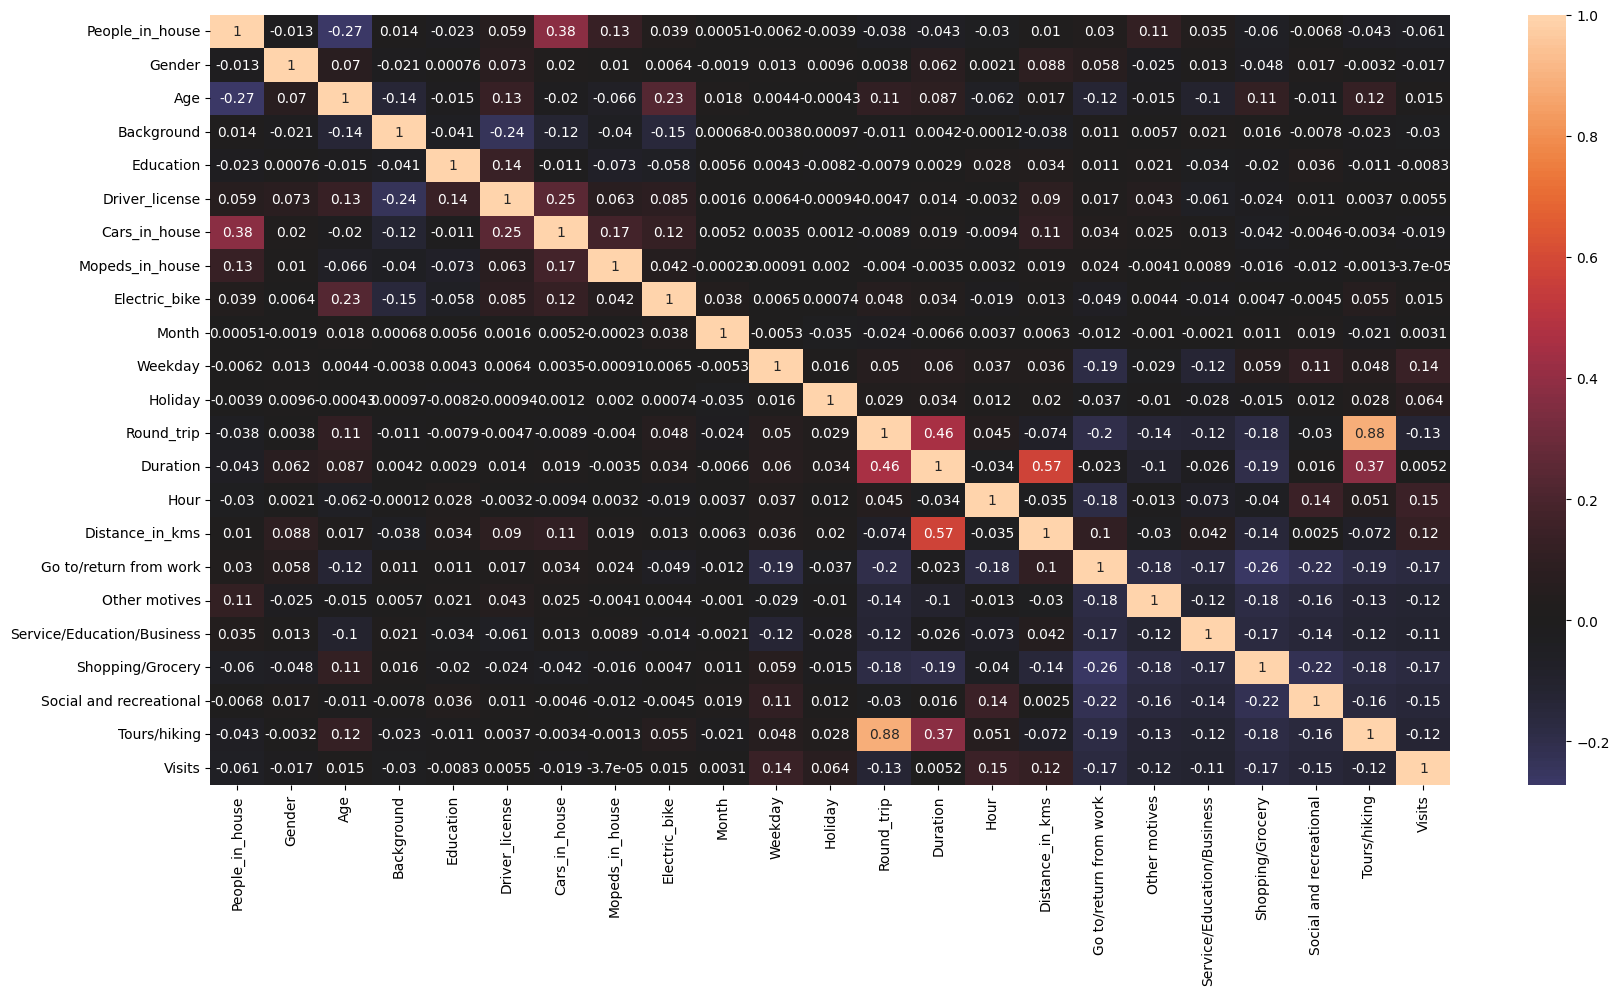

In [13]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [8]:
drops = ["Mode"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [9]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                      Variable       VIF
0                        const  0.000000
1              People_in_house  1.303519
2                       Gender  1.023995
3                          Age  1.257177
4                   Background  1.094937
5                    Education  1.037285
6               Driver_license  1.170348
7                Cars_in_house  1.292757
8              Mopeds_in_house  1.048141
9                Electric_bike  1.100648
10                       Month  1.004254
11                     Weekday  1.088919
12                     Holiday  1.008716
13                  Round_trip  5.660482
14                    Duration  2.410771
15                        Hour  1.097593
16             Distance_in_kms  1.958082
17      Go to/return from work       inf
18               Other motives       inf
19  Service/Education/Business       inf
20            Shopping/Grocery       inf
21     Social and recreational       inf
22                Tours/hiking       inf
23              

In [39]:
drops = ["Mode", "Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [40]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                      Variable        VIF
0                        const  73.252714
1              People_in_house   1.303274
2                       Gender   1.023853
3                          Age   1.256927
4                   Background   1.094936
5                    Education   1.037252
6               Driver_license   1.170341
7                Cars_in_house   1.292653
8              Mopeds_in_house   1.048139
9                Electric_bike   1.100633
10                       Month   1.004021
11                     Weekday   1.088197
12                     Holiday   1.008716
13                    Duration   2.057550
14                        Hour   1.097174
15             Distance_in_kms   1.817645
16      Go to/return from work   2.965440
17               Other motives   2.187759
18  Service/Education/Business   2.048275
19            Shopping/Grocery   2.832392
20     Social and recreational   2.344296
21                      Visits   2.068395


In [44]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Duration', 'Hour', 'Mode',
       'Distance_in_kms', 'Go to/return from work', 'Other motives',
       'Service/Education/Business', 'Shopping/Grocery',
       'Social and recreational', 'Tours/hiking', 'Visits'],
      dtype='object')

Those are the final features that we will use

In [43]:
df.duplicated().sum()

0

In [53]:
drops = ["Mode", "Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [54]:
X, y = shuffle(X, y, random_state=42)

In [55]:
X.shape

(631262, 21)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [57]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    234989
1    145022
2    124998
Name: count, dtype: int64

Class counts in y_test:
Mode
0    58748
1    36256
2    31249
Name: count, dtype: int64


In [58]:
X_train.shape, X_test.shape

((505009, 21), (126253, 21))

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X = sm.add_constant(X)
logit_model = sm.MNLogit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.577395
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                   Mode   No. Observations:               631262
Model:                        MNLogit   Df Residuals:                   631218
Method:                           MLE   Df Model:                           42
Date:                Wed, 21 Feb 2024   Pseudo R-squ.:                  0.4552
Time:                        00:50:13   Log-Likelihood:            -3.6449e+05
converged:                       True   LL-Null:                   -6.6906e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    Mode=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1567      0.039     55.273      0.000     

# Logistic Regression

In [60]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [61]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__max_iter': 400, 'classifier__solver': 'liblinear'}


In [62]:
score = grid_search_log.best_score_
score

0.7212996578585307

In [65]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     58748
           1       0.59      0.61      0.60     36256
           2       0.71      0.79      0.75     31249

    accuracy                           0.74    126253
   macro avg       0.72      0.73      0.72    126253
weighted avg       0.74      0.74      0.74    126253



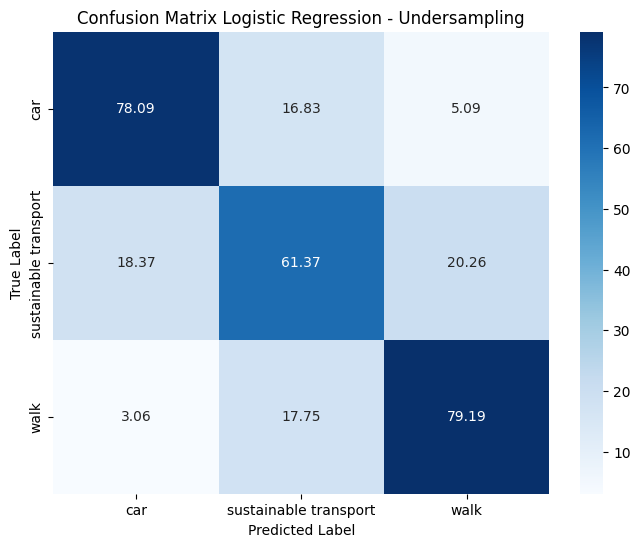

In [69]:
class_labels = ["car", "sustainable transport", "walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [70]:
class_labels_mapping = {
    0: 'car',
    1: "sustainable transport",
    2: 'walk'
}

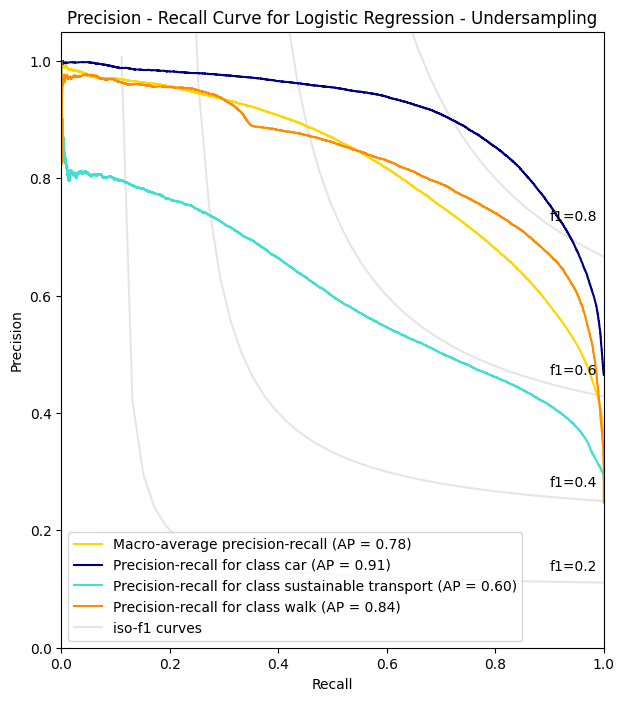

In [71]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["macro"], recall["macro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["macro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="macro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
)
display.plot(ax=ax, name="Macro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Undersampling")

plt.show()

# Decision Tree

In [72]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [73]:
param_grid = {
    'classifier__max_depth': list(range(2, 21)),
}

In [74]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20]},
             scoring='f1_macro')

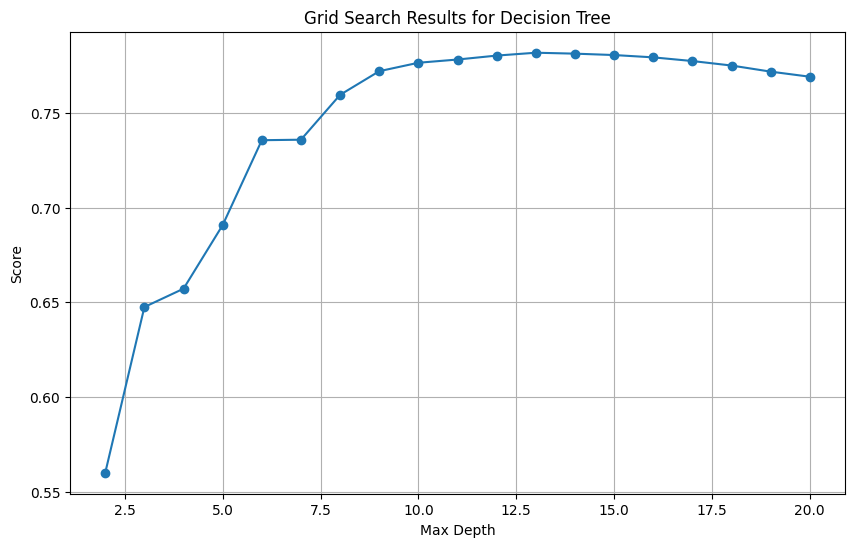

In [76]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [77]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [78]:
best_params

{'classifier__max_depth': 13}

In [79]:
best_f_score

0.7818651809100253

In [80]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.92      0.76      0.83     58748
           1       0.61      0.76      0.68     36256
           2       0.81      0.86      0.83     31249

    accuracy                           0.78    126253
   macro avg       0.78      0.79      0.78    126253
weighted avg       0.80      0.78      0.79    126253



In [81]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Duration', 'Hour', 'Distance_in_kms',
       'Go to/return from work', 'Other motives', 'Service/Education/Business',
       'Shopping/Grocery', 'Social and recreational', 'Visits'],
      dtype='object')

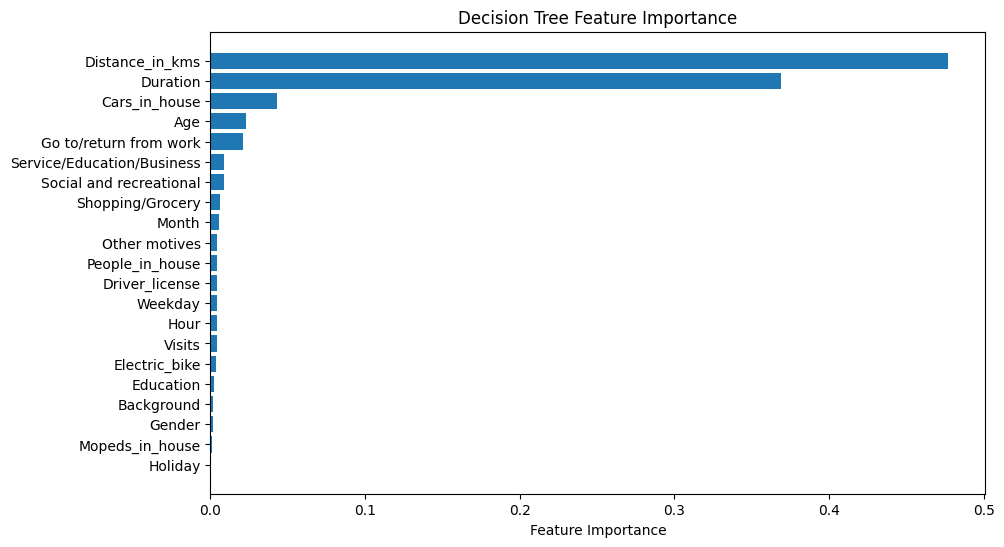

In [82]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Duration', 'Hour', 'Distance_in_kms',
       'Go to/return from work', 'Other motives', 'Service/Education/Business',
       'Shopping/Grocery', 'Social and recreational', 'Visits']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

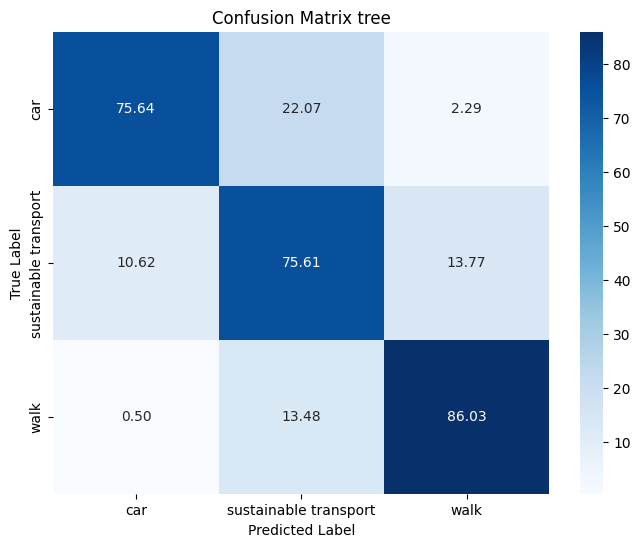

In [83]:
class_labels = ["car", "sustainable transport", "walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

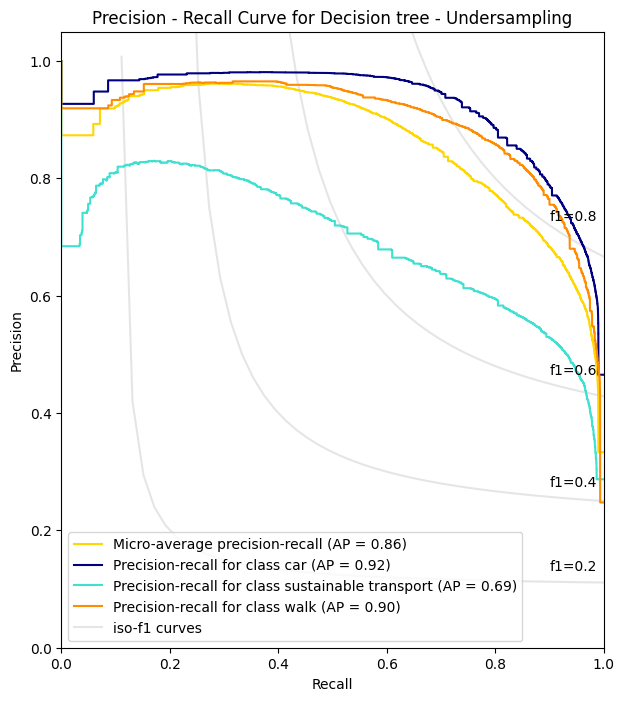

In [84]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Undersampling")

plt.show()

# Random Forest

In [86]:
X.shape

(631262, 21)

In [103]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [88]:
param_grid = {
    'classifier__max_features' : list(range(2, 8))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'classifier__max_features': [2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [91]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 4}


In [89]:
best_score = grid_search_rf.best_score_
print(best_score)

0.8230442947958464


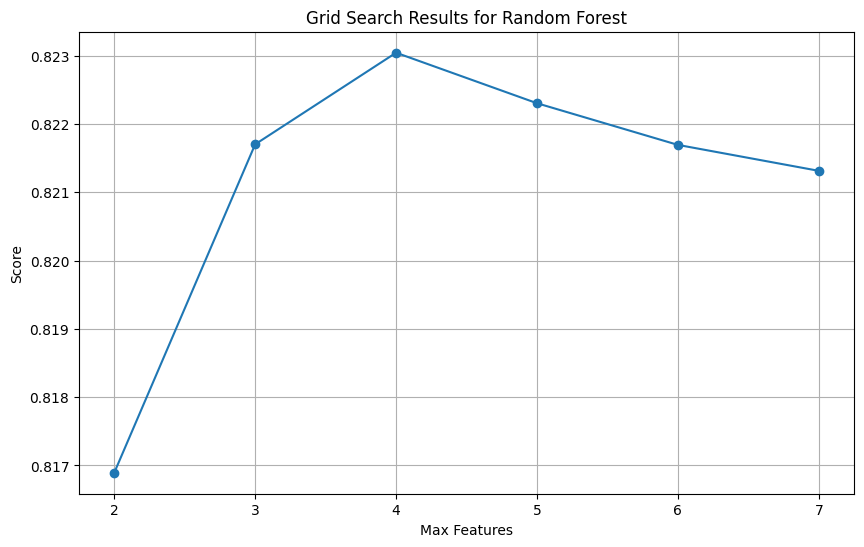

In [90]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'classifier__n_estimators' : [150, 250, 350],
    'classifier__max_features' : [4]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

In [18]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 5, 'classifier__n_estimators': 500}


In [19]:
best_score = grid_search_rf.best_score_
print(best_score)

0.8261009481420324


In [92]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     58748
           1       0.70      0.78      0.74     36256
           2       0.83      0.89      0.86     31249

    accuracy                           0.83    126253
   macro avg       0.82      0.83      0.82    126253
weighted avg       0.84      0.83      0.83    126253



In [93]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Duration', 'Hour', 'Distance_in_kms',
       'Go to/return from work', 'Other motives', 'Service/Education/Business',
       'Shopping/Grocery', 'Social and recreational', 'Visits'],
      dtype='object')

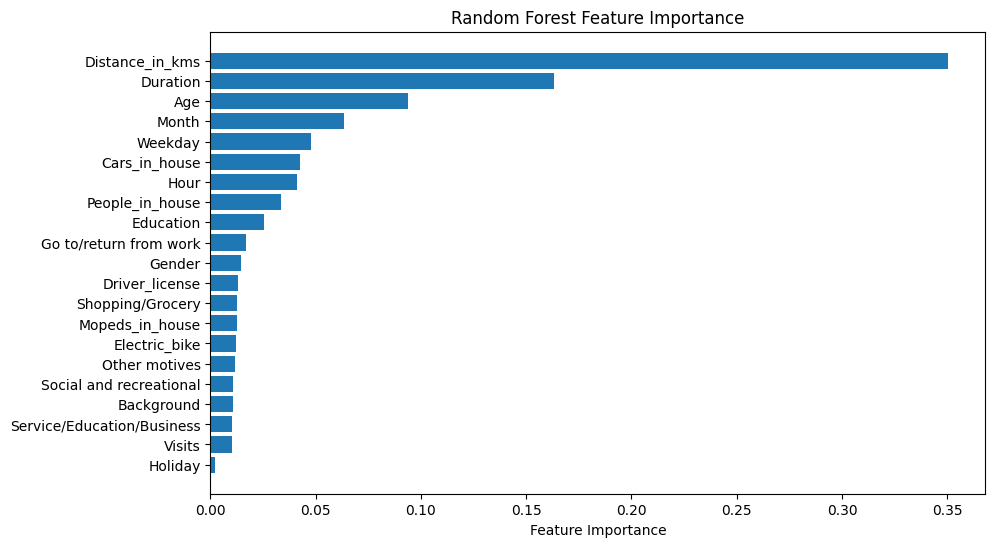

In [95]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Duration', 'Hour', 'Distance_in_kms',
       'Go to/return from work', 'Other motives', 'Service/Education/Business',
       'Shopping/Grocery', 'Social and recreational', 'Visits']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

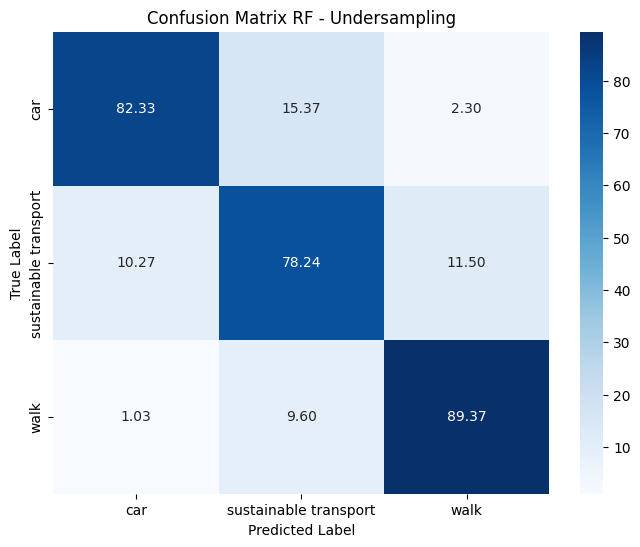

In [96]:
class_labels = ["car", "sustainable transport", "walk"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

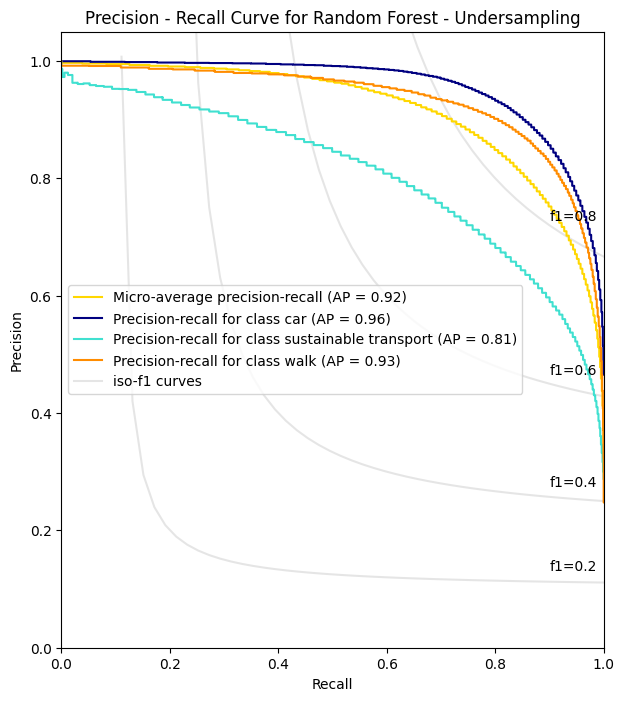

In [97]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Undersampling")

plt.show()

# XGBoost

In [126]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

In [86]:
param_grid = {
    'classifier__colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_typ...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=3,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1]},
             scoring='f1_macro')

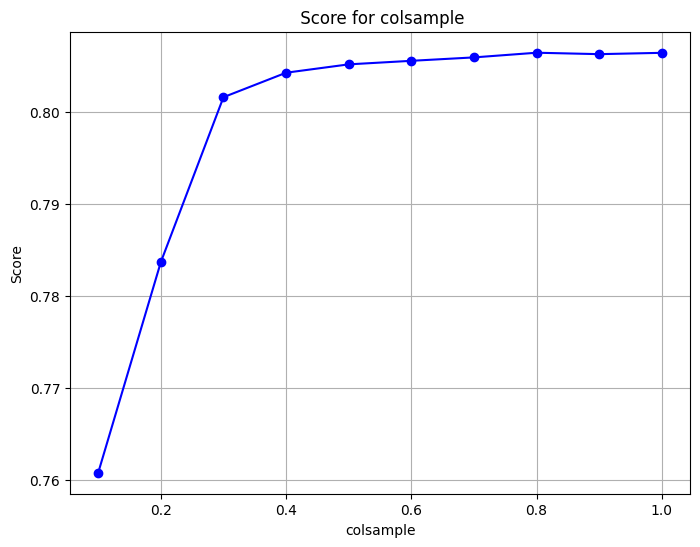

In [87]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [91]:
param_grid = {
    'classifier__subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

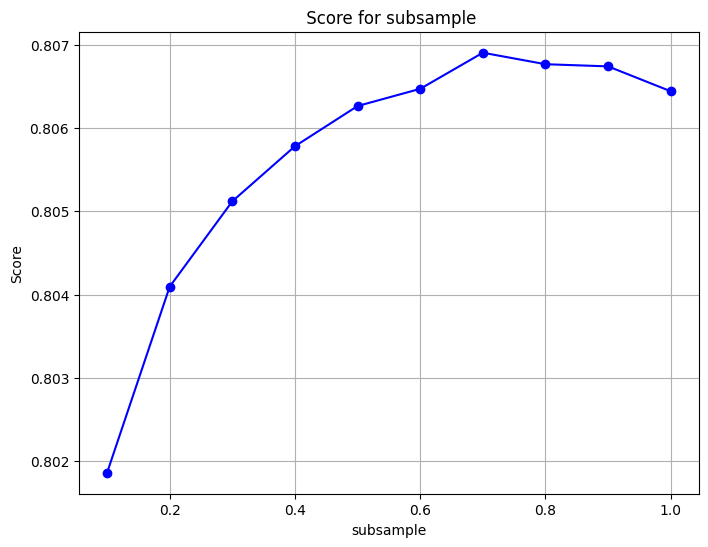

In [92]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [93]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

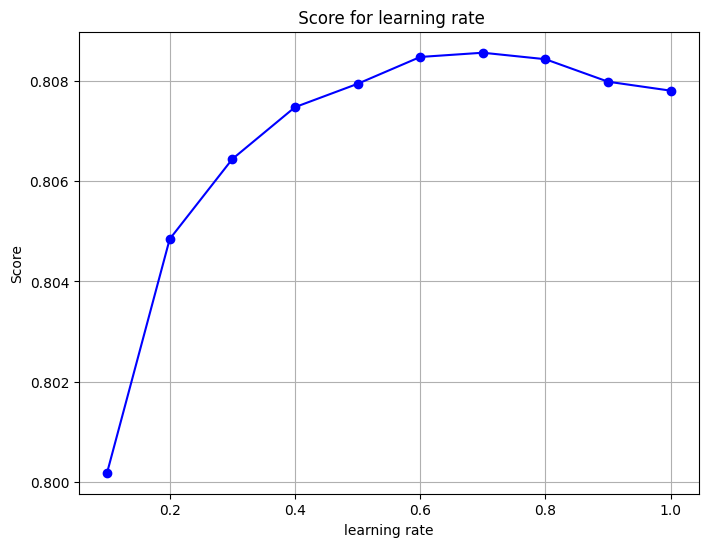

In [94]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [154]:
param_grid = {
    'classifier__gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
best_params_xgb

{'classifier__gamma': 0.3}

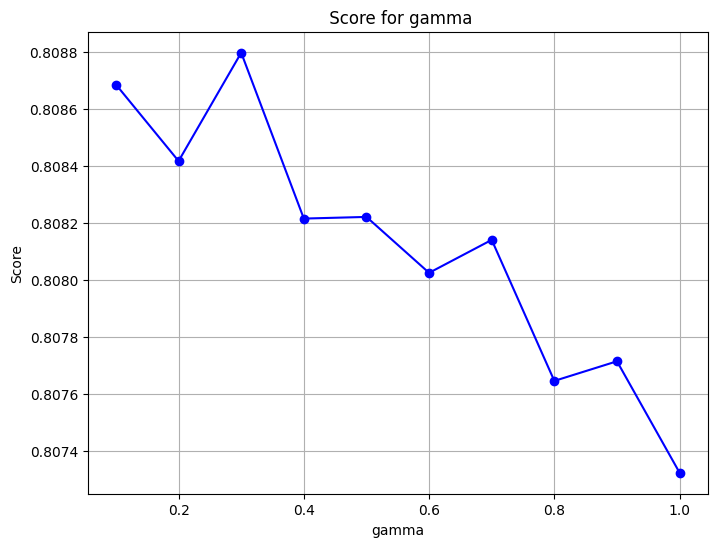

In [155]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__gamma']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for gamma')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.grid(True)
plt.show()

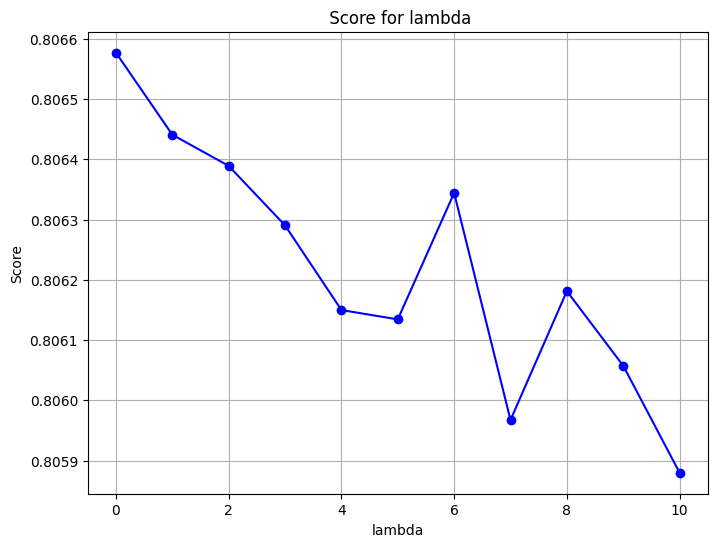

In [95]:
param_grid = {
    'classifier__reg_lambda' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__reg_lambda']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for lambda')
plt.xlabel('lambda')
plt.ylabel('Score')
plt.grid(True)
plt.show()

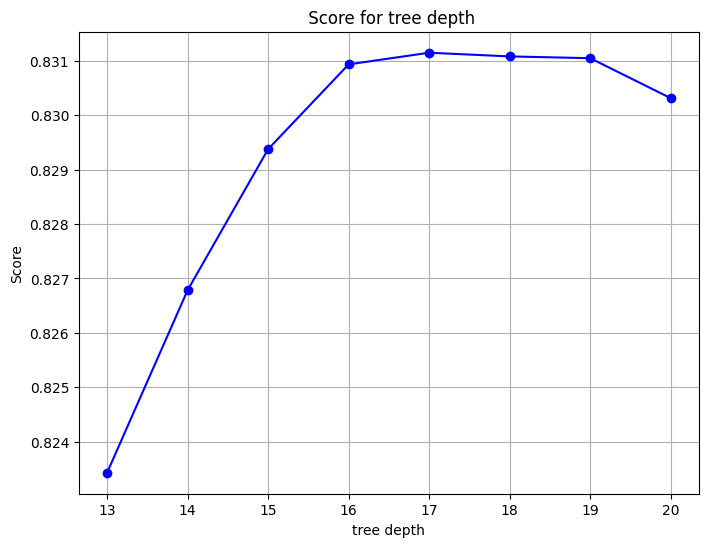

In [127]:
param_grid = {
    'classifier__max_depth' : [13, 14, 15, 16, 17, 18, 19, 20]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__max_depth']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for tree depth')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [130]:
param_grid = {
    'classifier__learning_rate' : [0.7],
    'classifier__subsample' : [0.7], 
    'classifier__n_estimators' : [100, 150, 200],
    'classifier__colsample_bytree' : [0.8],
    'classifier__max_depth': [17]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.7, 'classifier__max_depth': 17, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}


In [131]:
score = grid_search.best_score_
score

0.828113913796767

In [134]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     58748
           1       0.71      0.79      0.75     36256
           2       0.84      0.89      0.87     31249

    accuracy                           0.83    126253
   macro avg       0.83      0.84      0.83    126253
weighted avg       0.84      0.83      0.84    126253



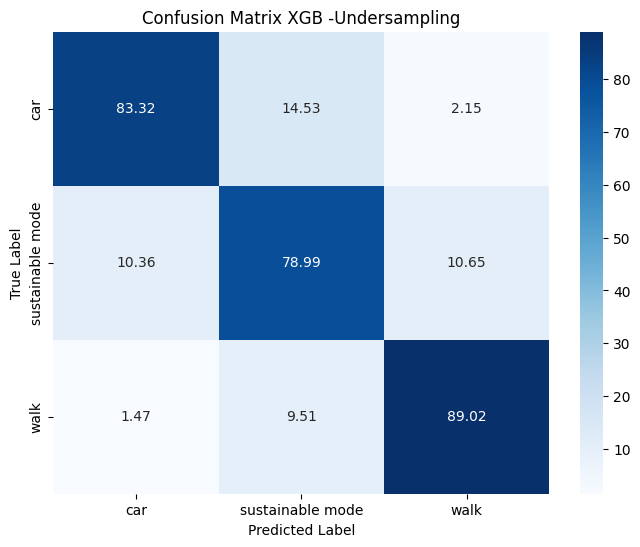

In [135]:
class_labels = ["car", "sustainable mode", "walk"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

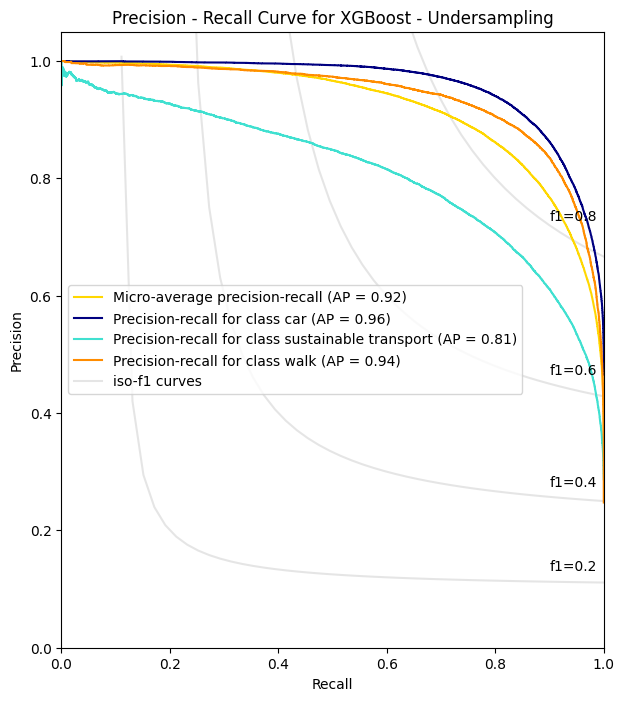

In [136]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Undersampling")

plt.show()

In [137]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Duration', 'Hour',
       'Distance_in_kms', 'Go to/return from work', 'Other motives',
       'Service/Education/Business', 'Shopping/Grocery',
       'Social and recreational', 'Visits'],
      dtype='object')

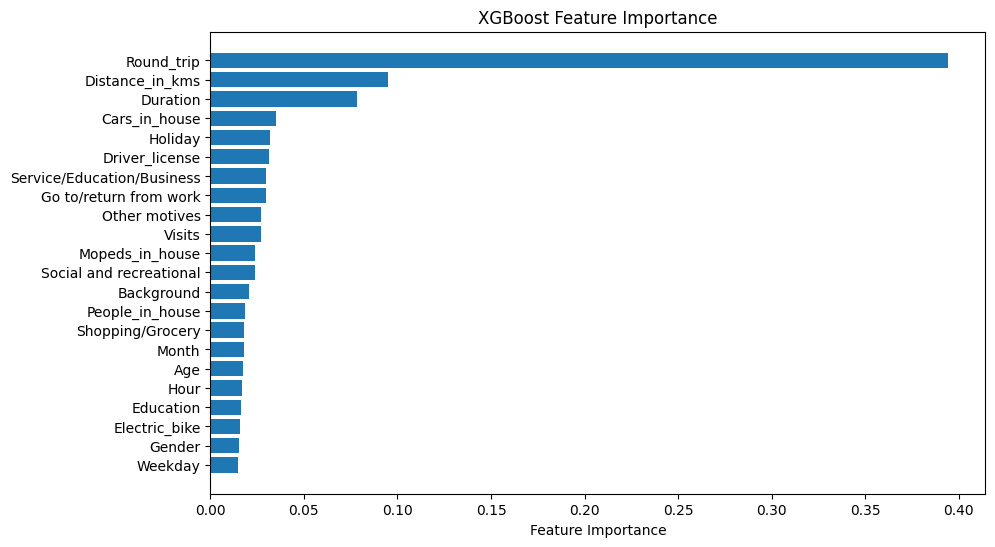

In [138]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Duration', 'Hour',
       'Distance_in_kms', 'Go to/return from work', 'Other motives',
       'Service/Education/Business', 'Shopping/Grocery',
       'Social and recreational', 'Visits']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()